# Use Case Business Analytics E-commerce company 

A Portuguese e-commerce company that sells electronic devices wants to extract business knowledge from data representing sales and product deliveries. Especially important is to develop models to:  
1. Predict if the product reach on time and also 
2. To predict next week total costs using the total costs of the previous two weeks. 

# CRISP-DM Methodology 

In [1]:
!pip install seaborn

In [2]:
#importar as principais livrarias 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Tabela deliveriesWarehouse

In [3]:
#extrair os dados
df1 = pd.read_csv('deliveriesWarehouses.csv')

In [4]:
df1

,id,warehouse
0,1,F
1,2,D
2,3,F
3,4,A
4,5,B
...,...,...
9639,9640,A
9640,9641,B
9641,9642,C
9642,9643,F


In [5]:
#dimensão
df1.shape

(9644, 2)

Há 9644 observações e 2 colunas:
1. coluna id - chave primária identificativa da entrega/cliente - chave estrangeira de relacionamento com a tabela deliveriesMain 
2. warehouse - identificação do armazém 

In [6]:
#info soube o DataFrame 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9644 non-null   int64 
 1   warehouse  9644 non-null   object
dtypes: int64(1), object(1)
memory usage: 150.8+ KB


Numa primeira análise não há missing values. 

1.Coluna id do tipo numérico inteiro

2.Coluna warehouse do tipo categórico 

In [7]:
#1ª análise automática 
#!pip install pandas-profiling

In [8]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df1)
#prof.to_file(output_file='output.html')

## Coluna warehouse

In [9]:
#variáveis do tipo objecto e categóricas 
df1.describe(include='O')

,warehouse
count,9644
unique,5
top,F
freq,3215


Há 5 variáveis únicas, a F é a mais registada 3215 vezes. 

In [10]:
#listar as variáveis únicas 
list(df1.warehouse.unique())

['F', 'D', 'A', 'B', 'C']

[Text(0, 0, '3215'),
 Text(0, 0, '1608'),
 Text(0, 0, '1607'),
 Text(0, 0, '1607'),
 Text(0, 0, '1607')]

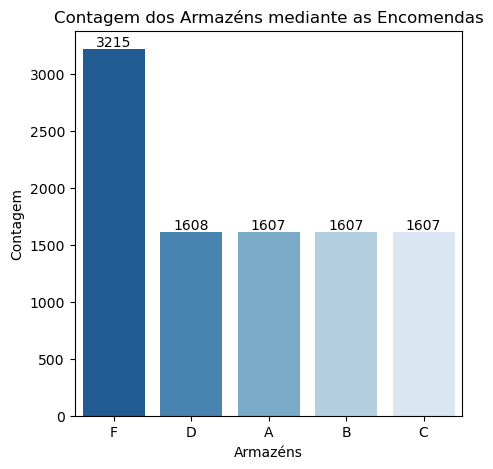

In [11]:
#warehouse count-plot
plt.figure(figsize =(5, 5))
a = sns.countplot(x=df1['warehouse'], order = df1['warehouse'].value_counts().index,
                  palette = 'Blues_r')

plt.title('Contagem dos Armazéns mediante as Encomendas')
plt.xlabel("Armazéns")
plt.ylabel("Contagem")

a.bar_label(a.containers[0])

In [12]:
#Replace Data Types to Category 
df1['warehouse']=df1['warehouse'].astype('category')

In [13]:
#verificação
df1.dtypes

id              int64
warehouse    category
dtype: object

## Coluna ID

In [14]:
df1.describe()

,id
count,9644.000000
mean,4822.500000
std,2784.127332
min,1.000000
25%,2411.750000
50%,4822.500000
75%,7233.250000
max,9644.000000


array([[<AxesSubplot:title={'center':'id'}>]], dtype=object)

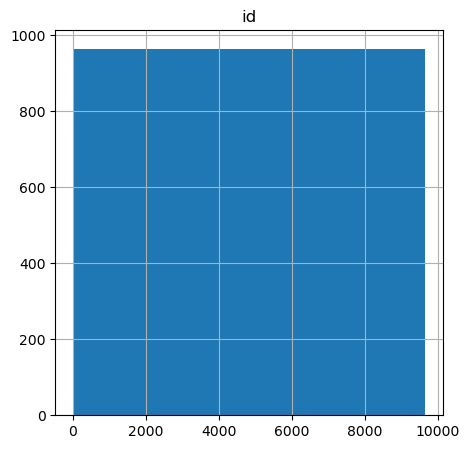

In [15]:
df1.hist(figsize=(5,5))

In [16]:
list(df1.id.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

## Duplicados

In [17]:
#Eliminação de linhas duplicadas, mantendo a 1ª (linhas exatamento iguais)
df1 = df1.drop_duplicates(keep='first')

In [18]:
df1

,id,warehouse
0,1,F
1,2,D
2,3,F
3,4,A
4,5,B
...,...,...
9639,9640,A
9640,9641,B
9641,9642,C
9642,9643,F


Confirma-se que não tem duplicados. 

## Tabela deliveriesMain

In [19]:
#extrair os dados - tabela dimensional 
df2 = pd.read_csv('deliveriesMain.csv')

In [20]:
df2

,id,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,1,Ship,3,2,234,3,medium,M,39,2099,2,1,0
1,2,Ship,3,4,122,3,high,F,15,1354,2,1,0
2,3,Ship,3,3,135,3,low,M,8,1074,2,1,0
3,4,Ship,3,5,103,3,low,M,3,1403,2,1,0
4,5,Ship,3,5,257,3,medium,F,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,9640,Flight,4,1,204,3,medium,M,3,4310,6,27,1
9640,9641,Flight,3,1,199,3,high,M,3,5127,6,27,1
9641,9642,Flight,3,4,216,3,low,F,3,5149,6,27,1
9642,9643,Flight,4,3,183,3,low,F,6,5712,6,27,0


In [21]:
#nomes das colunas  
df2.columns

Index(['id', 'shipment', 'number_customer_calls', 'customer_rating',
       'product_cost', 'number_prior_purchases', 'product_importance',
       'gender', 'discount', 'weight', 'weekday_of_purchase',
       'week_of_purchase', 'on_Time'],
      dtype='object')

1. id: id of the delivery/customer.
2. shipment: type of shipment delivery. 
3. number_customer_calls: the number of calls made by the customer to know details about the shipment.
4. customer_rating: service rating given by the customer (1 is the lowest (Worst) and 5 is the highest (Best)).
5. product_cost: cost of the product. 
6. number_prior_purchases: the number of prior purchases made by the customer.
7. product_importance: the company has categorized the product in the various parameter such as low, medium, high.
8. gender: gender of the client. 
9. discount: purchase discount offered on the product.
10. weight: the weight of the product in grams.
11. weekday_of_purchase: day of the week the product was purchased (2 is Monday, 3 is Tuesday, 4 is Wednesday, 5 is Thursday and 6 is Friday).
12. week_of_purchase: the week the product was purchased since the beginning of year 2022.
13. on_Time: 0 Indicates that the product has not reached on time and 1 indicates it has reached on time.

In [22]:
df2.shape

(9644, 13)

In [23]:
#1ª análise automática 
#!pip install pandas-profiling

In [24]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df2)
#prof.to_file(output_file='output2.html')

Pela análise do ProfileReport tira-se algumas conclusões: 
1. A coluna id é a chave primária 
2. Não há missing values
3. Não há duplicados
4. Temos variáveis categóricas e numéricas
5. Existe correlação entre a coluna id, discount, weekday_of_purchase e on_Time
6. Existe correlação entre a coluna discount, id e week_of_purchase
7. Existe correlação entre a coluna on_Time, id, week_of_purchase e discount e weight. 

Vou fazer um merge da BD deliveriesWarehouse e a BD deliveriesMain. 

In [25]:
#merge das duas tabelas
df = pd.merge(df1, df2, on='id')

In [26]:
df

,id,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,1,F,Ship,3,2,234,3,medium,M,39,2099,2,1,0
1,2,D,Ship,3,4,122,3,high,F,15,1354,2,1,0
2,3,F,Ship,3,3,135,3,low,M,8,1074,2,1,0
3,4,A,Ship,3,5,103,3,low,M,3,1403,2,1,0
4,5,B,Ship,3,5,257,3,medium,F,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,9640,A,Flight,4,1,204,3,medium,M,3,4310,6,27,1
9640,9641,B,Flight,3,1,199,3,high,M,3,5127,6,27,1
9641,9642,C,Flight,3,4,216,3,low,F,3,5149,6,27,1
9642,9643,F,Flight,4,3,183,3,low,F,6,5712,6,27,0


In [27]:
df.dtypes

id                           int64
warehouse                 category
shipment                    object
number_customer_calls        int64
customer_rating              int64
product_cost                 int64
number_prior_purchases       int64
product_importance          object
gender                      object
discount                     int64
weight                       int64
weekday_of_purchase          int64
week_of_purchase             int64
on_Time                      int64
dtype: object

In [28]:
#1ª análise automática 
#!pip install pandas-profiling

In [29]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output3.html')

In [30]:
#Nomear as colunas do tipo Objeto 
columns_cat = [['shipment'], ['product_importance'], ['gender']]

In [31]:
#Replace Data Types to Category
for column in columns_cat: 
    df[column] = df[column].astype('category')

In [32]:
#verificação de missing values e tipos de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9644 entries, 0 to 9643
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      9644 non-null   int64   
 1   warehouse               9644 non-null   category
 2   shipment                9644 non-null   category
 3   number_customer_calls   9644 non-null   int64   
 4   customer_rating         9644 non-null   int64   
 5   product_cost            9644 non-null   int64   
 6   number_prior_purchases  9644 non-null   int64   
 7   product_importance      9644 non-null   category
 8   gender                  9644 non-null   category
 9   discount                9644 non-null   int64   
 10  weight                  9644 non-null   int64   
 11  weekday_of_purchase     9644 non-null   int64   
 12  week_of_purchase        9644 non-null   int64   
 13  on_Time                 9644 non-null   int64   
dtypes: category(4), int64(10

In [33]:
df.describe()

,id,number_customer_calls,customer_rating,product_cost,number_prior_purchases,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
count,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000
mean,4822.500000,4.072999,2.991186,210.433534,3.547491,13.387495,3663.537536,4.508917,13.903049,0.401701
std,2784.127332,1.153949,1.412315,48.370811,1.527488,16.210744,1621.741224,1.331976,7.304806,0.490267
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,2.000000,1.000000,0.000000
25%,2411.750000,3.000000,2.000000,170.000000,3.000000,4.000000,1872.000000,4.000000,7.000000,0.000000
50%,4822.500000,4.000000,3.000000,214.000000,3.000000,7.000000,4172.000000,5.000000,13.000000,0.000000
75%,7233.250000,5.000000,4.000000,251.000000,4.000000,10.000000,5062.000000,6.000000,20.000000,1.000000
max,9644.000000,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,6.000000,27.000000,1.000000


In [34]:
#Vamos analisar a distribuição dos dados 
columns = df.columns

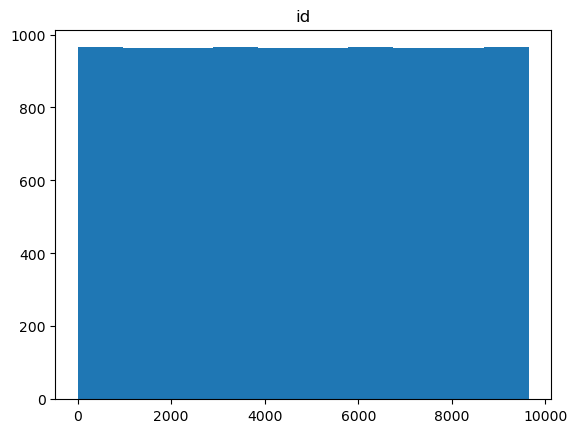

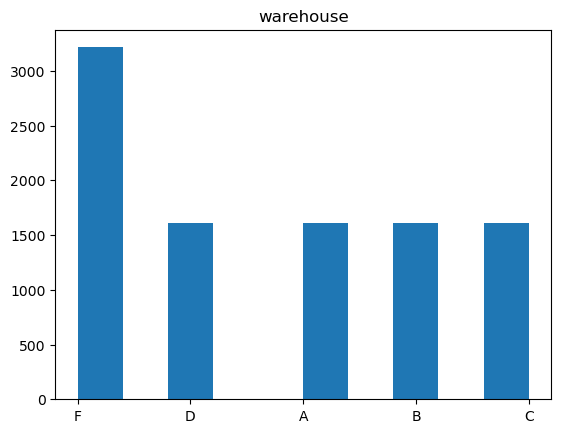

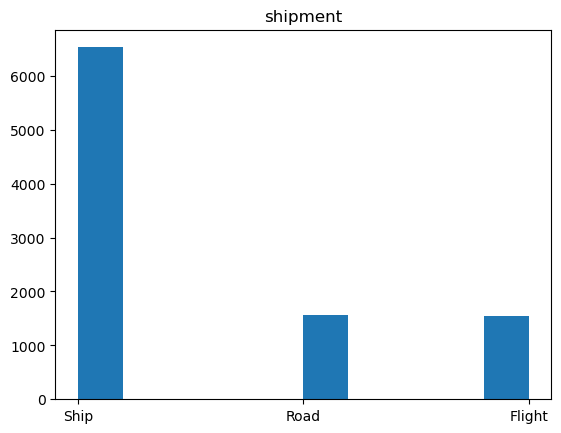

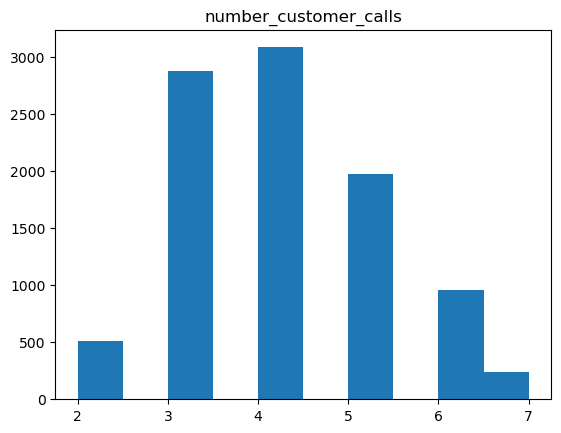

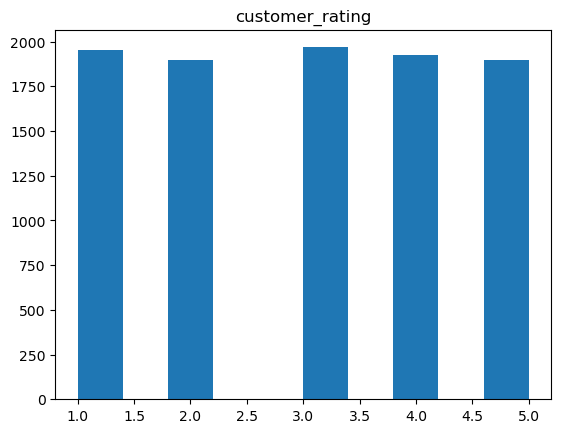

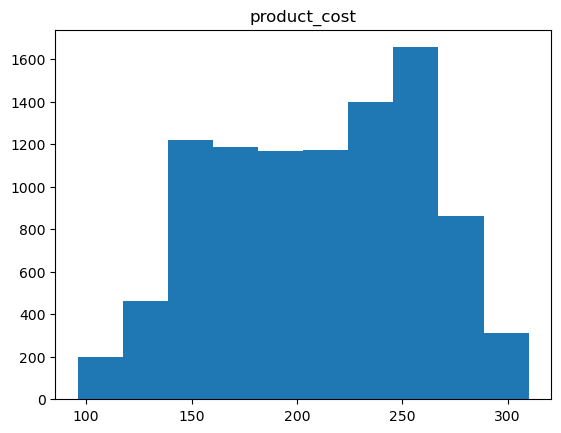

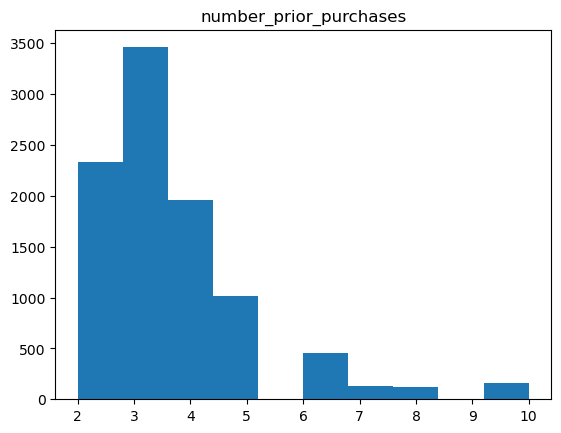

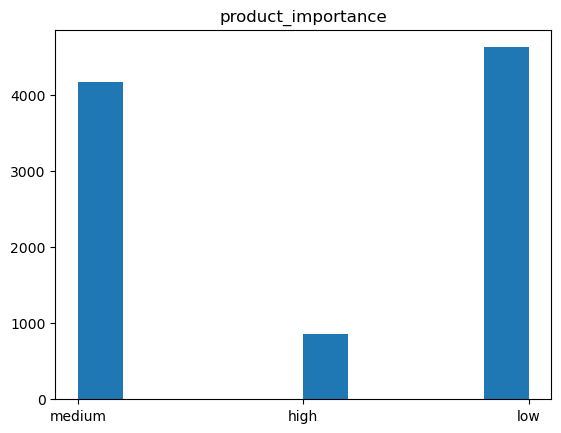

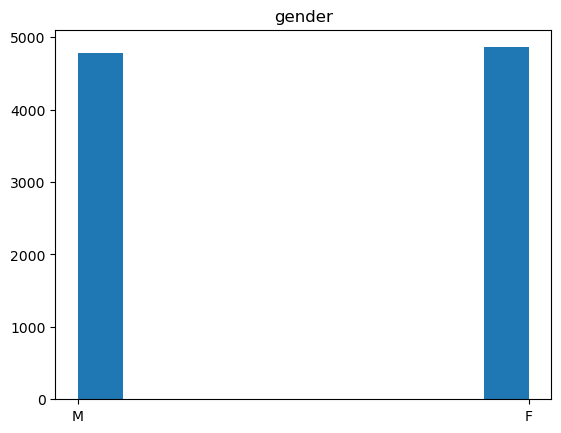

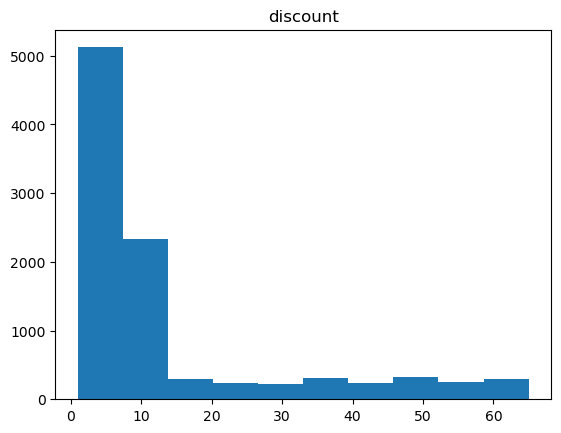

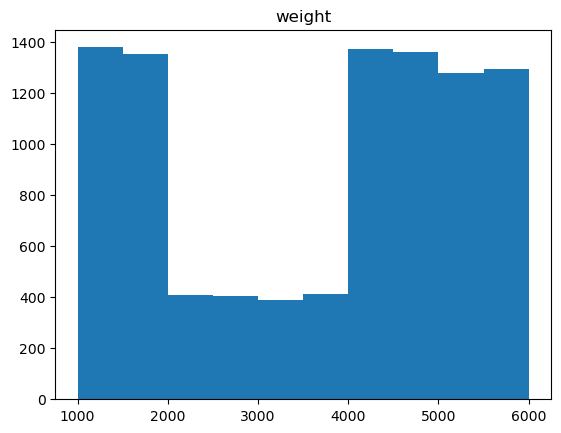

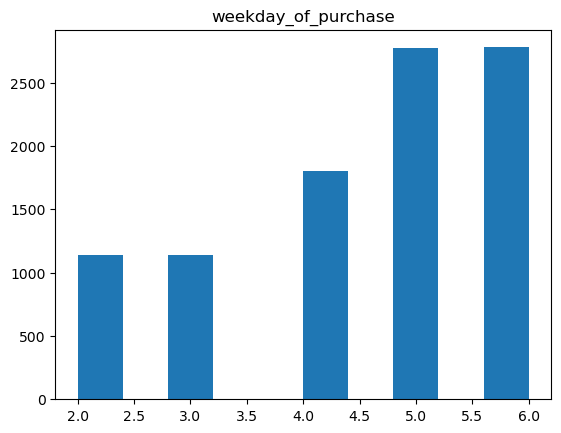

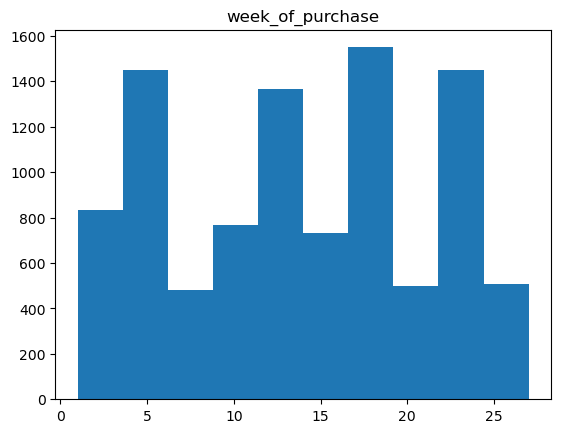

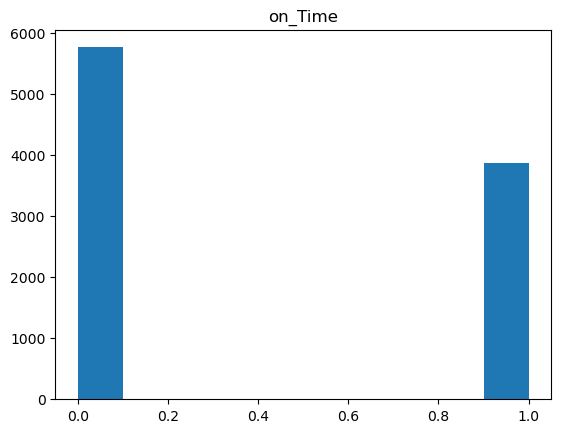

In [35]:
for col in columns:
    plt.hist(x=df[col])
    plt.title(col)
    plt.show()

1. Warehouse já fize a análise em cima
2. Shipment: há 3 tipos e o Ship é o mais utilizado comparativamente com o Road e o Flight que têm uma distribuição semelhante
3. Number_of_customer_calls: 3 e 4 chamadas para acompanhar a encomenda é o mais observado, podendo chegar até 7 chamadas
4. customer_rating: de 1(lowest) até 5(highest) e é muito equilibrado
5. product_cost: minimo é 96 e o máximo é 310. À primeira vista parece não ter outliers (a verificar)
6. number_prior_purchases: minimo é 2 encomendas prévias e o máximo é 10 (a verificar outliers) 
7. product_importance: há 2 categorias: medium, high and low, a high é a menos observada. 
8. gender: male e female: equilibrados
9. discount: mínimo 1 e maximo 65 - a verificar outliers
10. weight: 3896 pesos distintos, minimo 1001 e máximo 6000 (a verificar outliers) 
11. weekday_of_purchase: dia da semana, 5ª e 6ª feira são os dias da semana com mais encomendas, já 2ª e 3ª feira os dias com menos encomendas. 
12. week_of_purchase: temos 27 semanas - a validar as encomendas por semana (countplot) 
13. on_Time: temos 2 variáveis: 0 não chegou a tempo e 1 chegou a tempo, sendo que temos mais encomendas que não chegaram a tempo que sim - target para previsão se chegou a tempo ou não. 

## Outliers

## Coluna product_cost

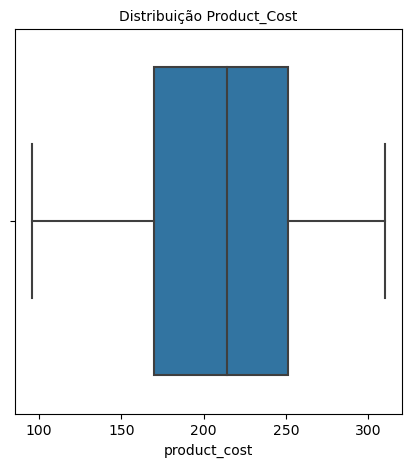

In [36]:
plt.figure(figsize = (5,5))
sns.boxplot(x = df['product_cost'])
plt.title('Distribuição Product_Cost',size=10)
plt.show()

Não existem outliers. 

## Coluna number_prior_purchases

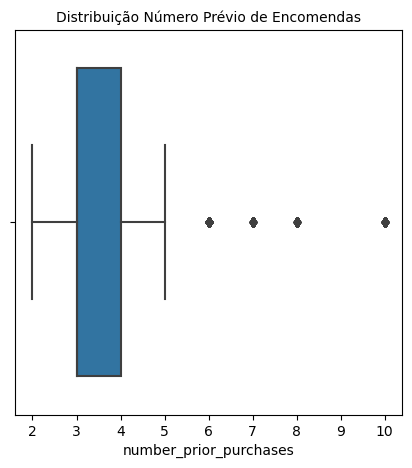

In [37]:
plt.figure(figsize = (5,5))
sns.boxplot(x = df['number_prior_purchases'])
plt.title('Distribuição Número Prévio de Encomendas',size=10)
plt.show()

In [38]:
#calculo do IQR da coluna 
Q1 = df2['number_prior_purchases'].quantile(0.25)
Q3 = df2['number_prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =', IQR)

IQR = 1.0


In [39]:
#localização dos outliers
dfo1 = df[(df['number_prior_purchases']< Q1-1.5* IQR) | (df['number_prior_purchases']> Q3+1.5* IQR)]

In [40]:
dfo1

,id,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
88,89,B,Ship,4,1,275,10,medium,F,23,2726,3,1,0
92,93,F,Ship,3,4,145,8,low,F,15,1429,3,1,0
96,97,F,Ship,3,4,220,7,low,M,43,2620,3,1,0
97,98,D,Ship,3,4,244,8,low,M,1,2703,3,1,0
98,99,F,Ship,4,2,186,7,medium,F,40,3111,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9569,9570,C,Ship,4,4,274,6,low,M,10,1355,6,26,0
9571,9572,D,Ship,4,5,251,6,low,F,1,1625,6,26,1
9577,9578,D,Ship,4,4,266,6,low,F,2,1776,6,26,0
9583,9584,D,Ship,5,5,217,6,medium,M,5,1616,6,26,1


Consideram que todas as encomendas superiores a 5 são outliers. Temos 869 encomendas nestas condições. É importante ter isto em conta para os modelos: 
1. Identificar e remover - pode levar a perda de informação importante
2. Transformar os dados - normalização por exemplo
3. Modelos baseados em DT e Regressão podem ser menos sensiveis a outliers
4. Tratar os outliers como uma categoria separada

In [41]:
dfo1['on_Time'].value_counts()

0    521
1    348
Name: on_Time, dtype: int64

## Coluna discount

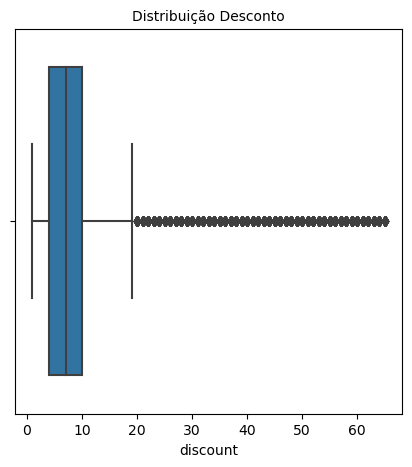

In [42]:
plt.figure(figsize = (5,5))
sns.boxplot(x = df['discount'])
plt.title('Distribuição Desconto',size=10)
plt.show()

In [43]:
#calculo do IQR da coluna 
Q1 = df2['discount'].quantile(0.25)
Q3 = df2['discount'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =', IQR)

IQR = 6.0


In [44]:
#localização dos outliers
dfo2 = df[(df['discount']< Q1-1.5* IQR) | (df['discount']> Q3+1.5* IQR)]

In [45]:
dfo2

,id,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,1,F,Ship,3,2,234,3,medium,M,39,2099,2,1,0
7,8,D,Ship,4,5,188,3,low,M,38,3031,2,1,0
10,11,B,Ship,3,5,262,2,low,F,53,3275,2,1,0
11,12,C,Ship,2,3,157,2,low,M,45,1965,2,1,0
12,13,F,Ship,5,3,238,2,medium,F,21,2053,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2764,A,Road,3,1,169,3,high,M,24,1740,6,8,0
2765,2766,C,Road,6,5,246,4,medium,M,50,3618,6,8,0
2766,2767,F,Road,4,1,232,3,medium,M,55,2686,2,9,0
2767,2768,D,Road,3,5,251,3,low,F,21,2476,2,9,0


In [46]:
dfo2.describe()

,id,number_customer_calls,customer_rating,product_cost,number_prior_purchases,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.00000,1943.000000,1943.000000,1943.000000,1943.000000,1943.0
mean,1392.949563,3.785898,2.974267,197.299537,3.33299,42.769429,2372.867216,4.008235,4.826557,0.0
std,791.187373,0.976272,1.424863,45.216379,1.58708,13.176155,894.054559,1.421453,2.056683,0.0
min,1.000000,2.000000,1.000000,96.000000,2.00000,20.000000,1001.000000,2.000000,1.000000,0.0
25%,715.500000,3.000000,2.000000,160.000000,2.00000,32.000000,1582.000000,3.000000,3.000000,0.0
50%,1401.000000,4.000000,3.000000,195.000000,3.00000,43.000000,2256.000000,4.000000,6.000000,0.0
75%,2073.500000,4.000000,4.000000,234.000000,4.00000,54.000000,3160.000000,5.000000,6.000000,0.0
max,2769.000000,7.000000,5.000000,296.000000,10.00000,65.000000,4000.000000,6.000000,9.000000,0.0


Todos os descontos superiores a 20% até 65% são considerados outliers. 
Temos 1943 observações. 

In [47]:
dfo2['on_Time'].value_counts()

0    1943
Name: on_Time, dtype: int64

Todas as observações não foram entregues a tempo. 

## Coluna weight

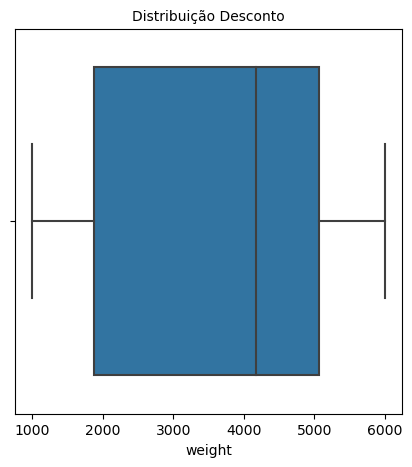

In [49]:
plt.figure(figsize = (5,5))
sns.boxplot(x = df['weight'])
plt.title('Distribuição Desconto',size=10)
plt.show()

Não existem outliers. 

# Exportação do csv

In [48]:
df.to_csv('base_dados.csv')